In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(
    style="whitegrid",
    context="talk",      # bigger fonts
    palette="viridis"    # modern color palette
)


In [2]:
df = pd.read_csv("ds_salary_eda_ready.csv")

In [3]:
df.head(3)

,Job Title,job_category,seniority,Job Description,desc_len,Rating,Company Name,Company text,Location,Headquarters,...,skill_python,skill_r studio,skill_excel,skill_machine learning,skill_analysis,skill_spark,skill_aws,Min_salary,Max_salary,Avg_salary
0,Data Scientist,data scientist,na,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",2536,3.8,Tecolote Research\n3.8,Tecolote Research,"Albuquerque, NM","Goleta, CA",...,1,0,1,1,1,0,0,53,91,72.0
1,Healthcare Data Scientist,data scientist,na,What You Will Do:\n\nI. General Summary\n\nThe...,4783,3.4,University of Maryland Medical System\n3.4,University of Maryland Medical System,"Linthicum, MD","Baltimore, MD",...,1,0,0,1,1,0,0,63,112,87.5
2,Data Scientist,data scientist,na,"KnowBe4, Inc. is a high growth information sec...",3461,4.8,KnowBe4\n4.8,KnowBe4,"Clearwater, FL","Clearwater, FL",...,1,0,1,1,1,1,0,80,90,85.0


In [4]:
df.describe()

,desc_len,Rating,same_state,Founded,company_age,competitors_counts,Hourly,employe provided,skill_python,skill_r studio,skill_excel,skill_machine learning,skill_analysis,skill_spark,skill_aws,Min_salary,Max_salary,Avg_salary
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3869.545822,3.618868,0.557951,1837.154987,46.591644,0.433962,0.032345,0.022911,0.524259,0.0,0.181941,0.424528,0.595687,0.208895,0.160377,74.719677,128.149596,101.434636
std,1521.495868,0.801210,0.496965,497.183763,53.778815,1.860254,0.177034,0.149721,0.499748,0.0,0.386056,0.494605,0.491090,0.406793,0.367203,30.980593,45.220324,37.546122
min,407.000000,-1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,16.000000,15.500000
25%,2801.000000,3.300000,0.000000,1939.000000,11.000000,-1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,96.000000,73.500000
50%,3731.000000,3.700000,1.000000,1988.000000,24.000000,-1.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,69.500000,124.000000,97.500000
75%,4740.000000,4.000000,1.000000,2007.000000,59.000000,3.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,91.000000,155.000000,122.500000
max,10051.000000,5.000000,1.000000,2019.000000,276.000000,4.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,202.000000,306.000000,254.000000


## Plots

In [5]:
num_col = df.select_dtypes(exclude='object').columns
chat_col = df.select_dtypes(include= 'object').columns

### Numeric

In [6]:
imputations = {"Rating":'mean','Founded':'median',}

for col,imputor in imputations.items():
    df[col] = df[col].replace(-1,np.nan)
    if imputor == 'mean':    
        df[col] = df[col].fillna(df[col].mean())
    elif imputor == 'median':
        df[col] = df[col].fillna(df[col].median())
                    


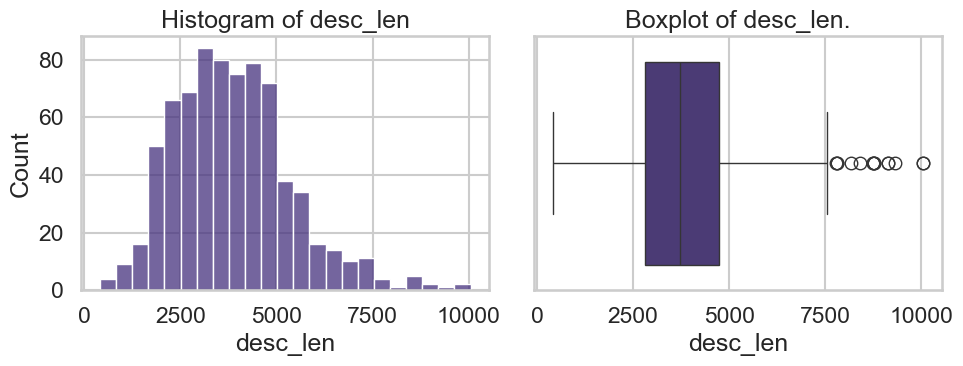

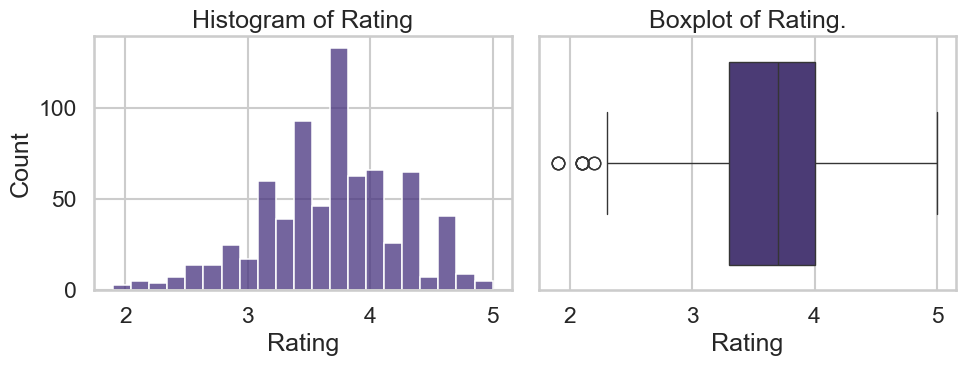

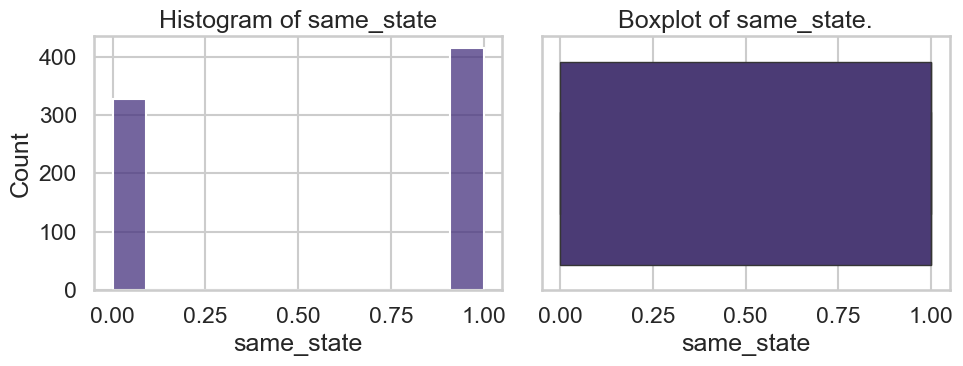

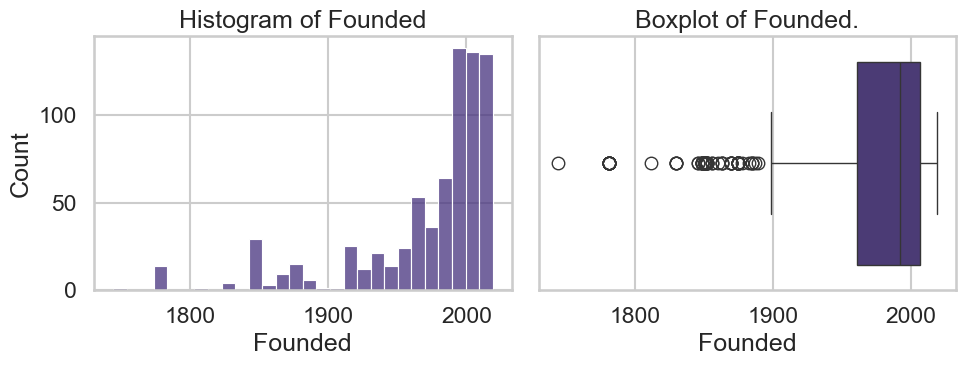

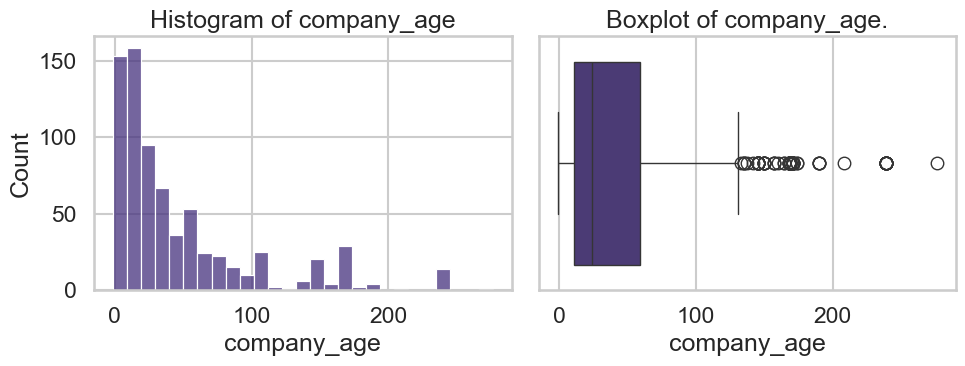

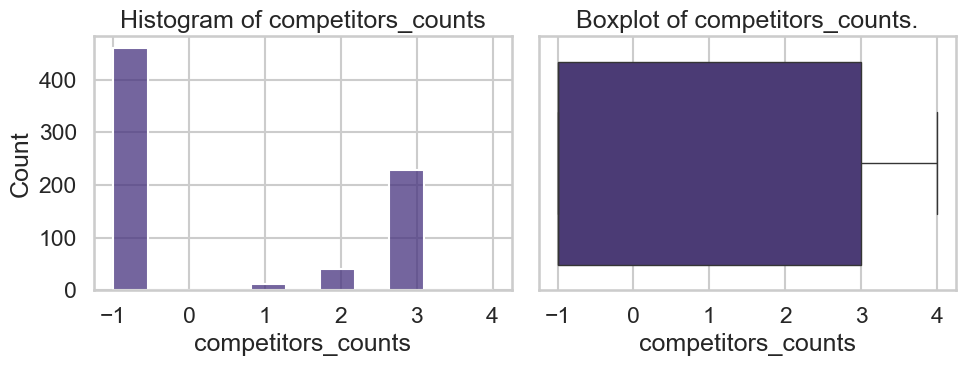

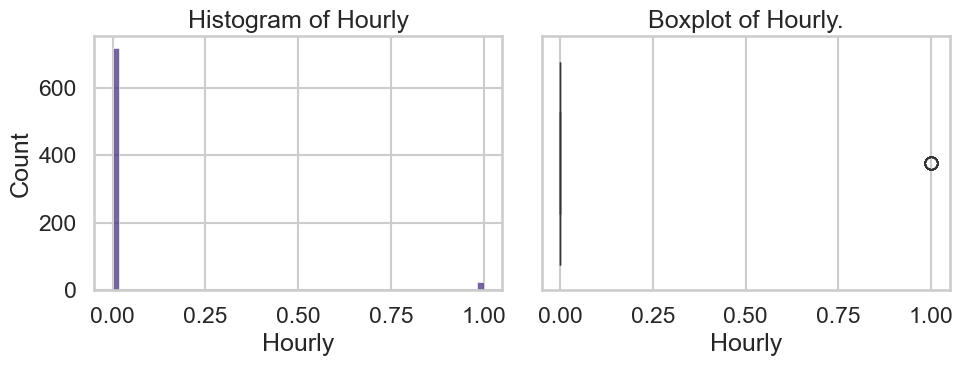

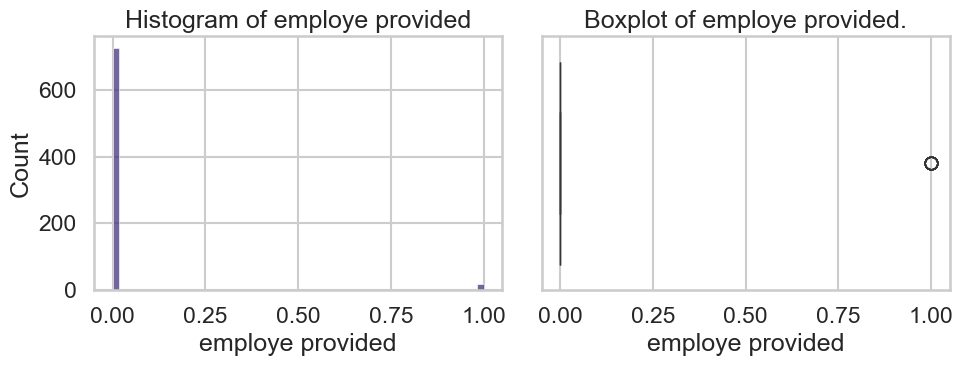

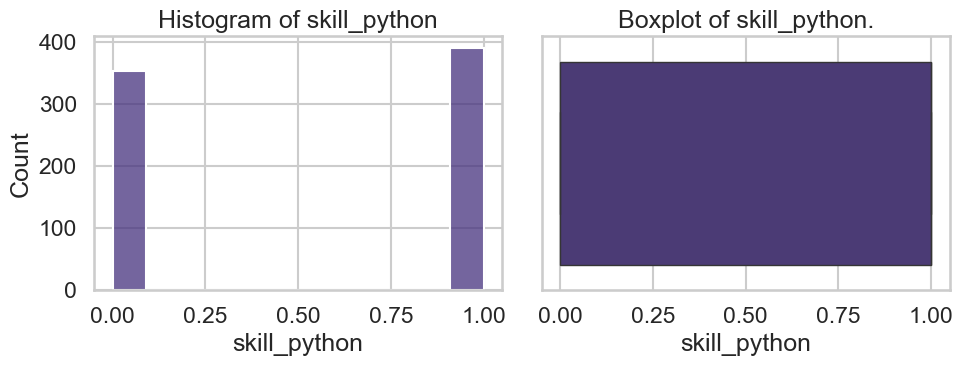

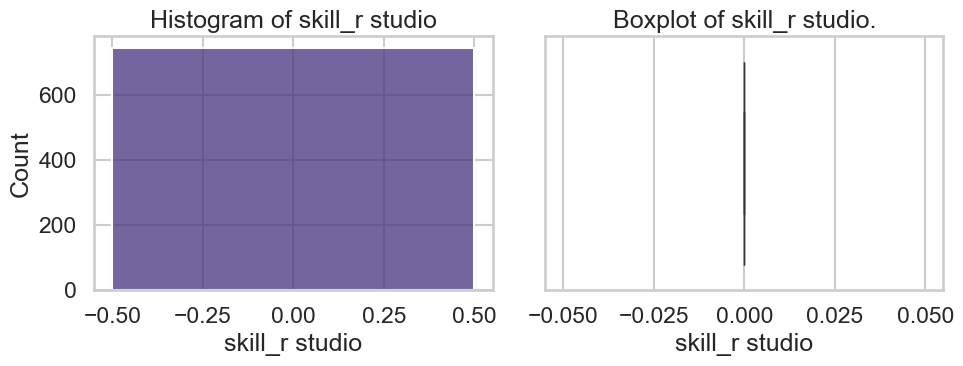

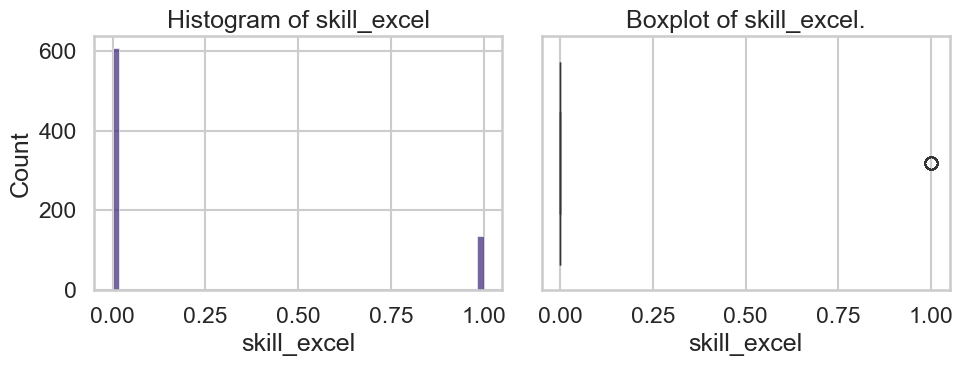

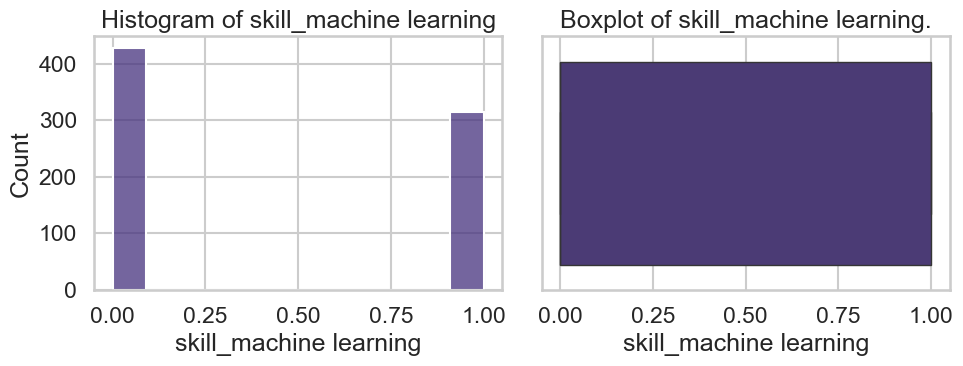

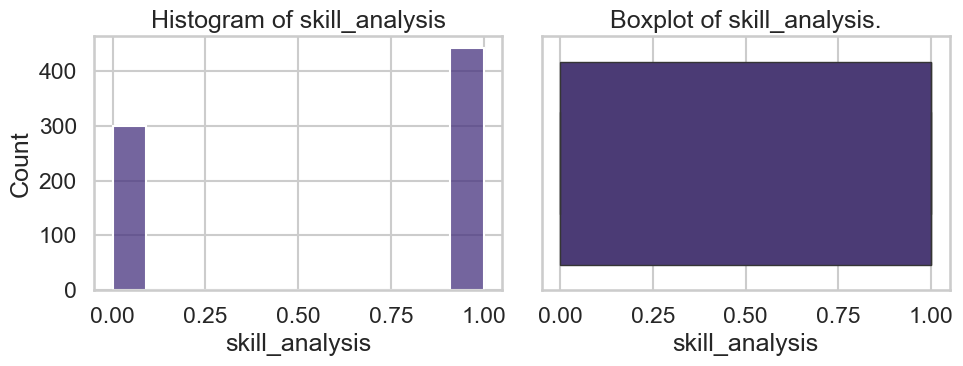

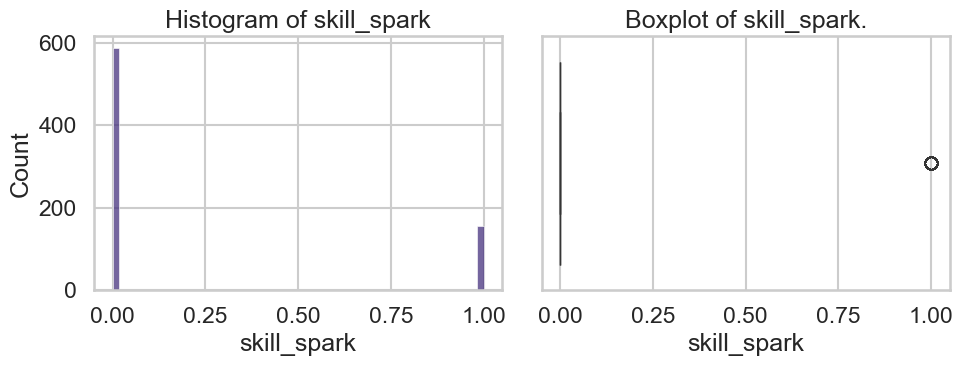

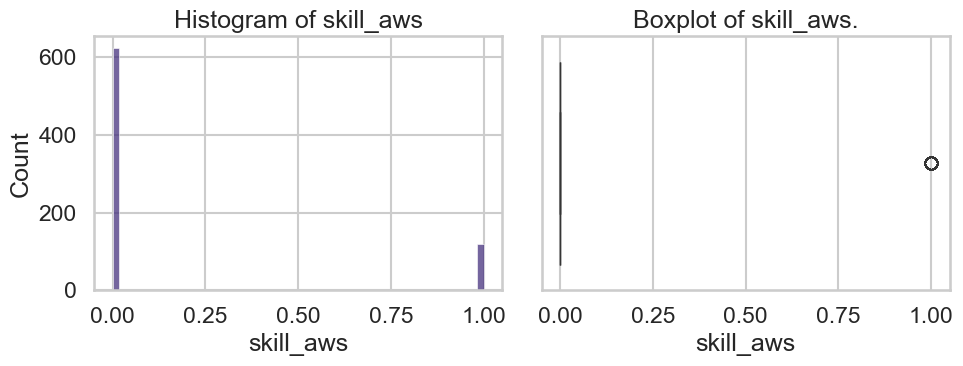

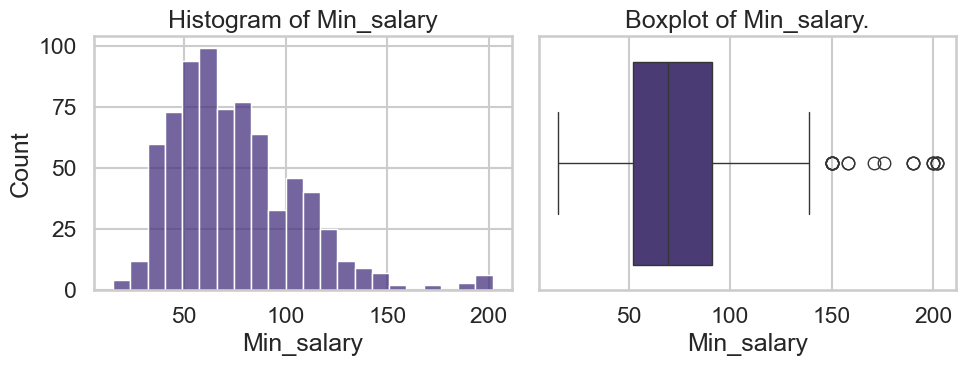

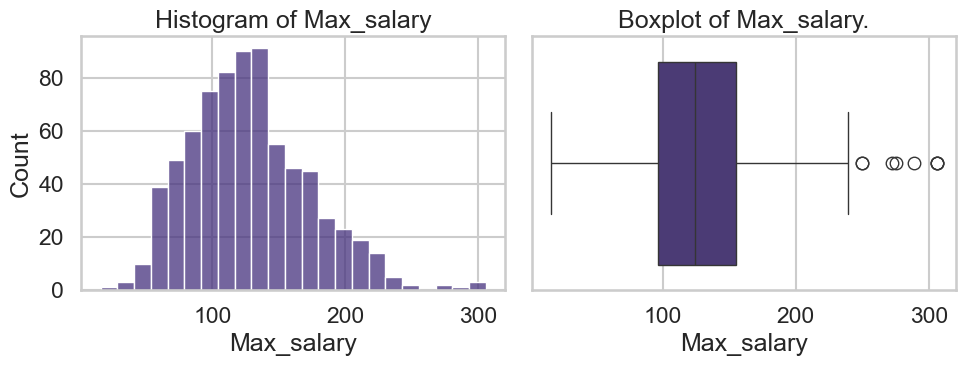

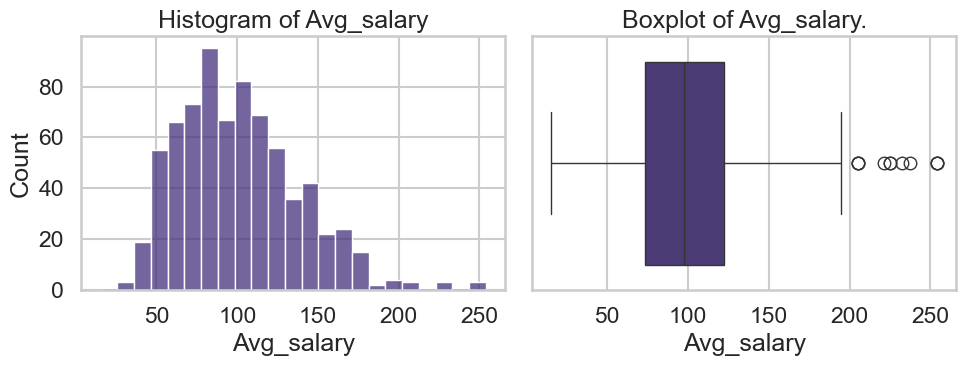

In [7]:
for i in num_col:
    fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,4))

    # plt.title(f'Histogram of {i}')
    sns.histplot(data=df, x=i,ax=axes[0])
    axes[0].set_title(f'Histogram of {i}')

    sns.boxplot(data=df,x = i,ax=axes[1])
    axes[1].set_title(f'Boxplot of {i}.')
    plt.tight_layout()
    plt.show()

<Axes: >

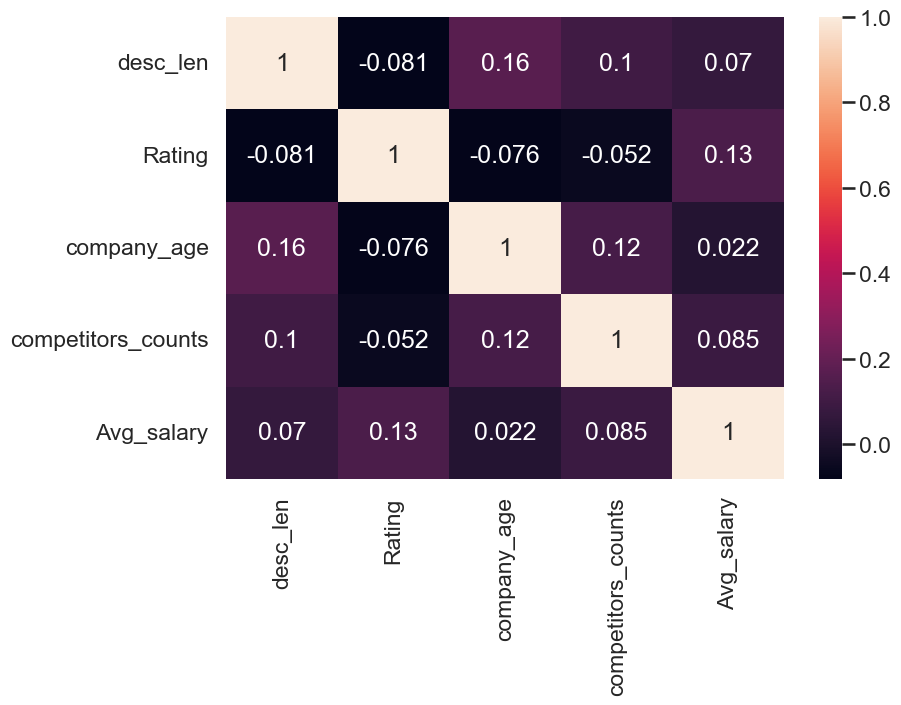

In [8]:
plt.figure(figsize=(9,6))
col ='desc_len Rating company_age competitors_counts Avg_salary'.split(' ')
sns.heatmap( df[col].corr(), annot=True)

### Categorical Variable

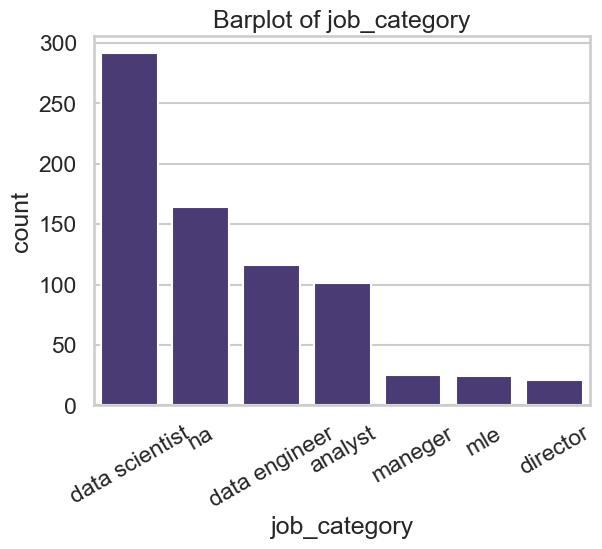

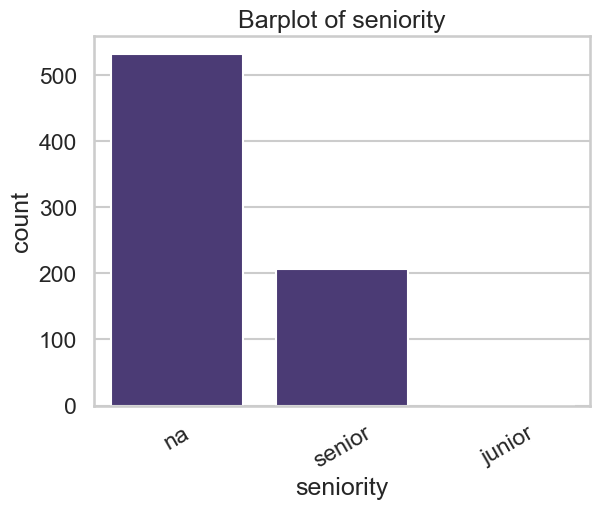

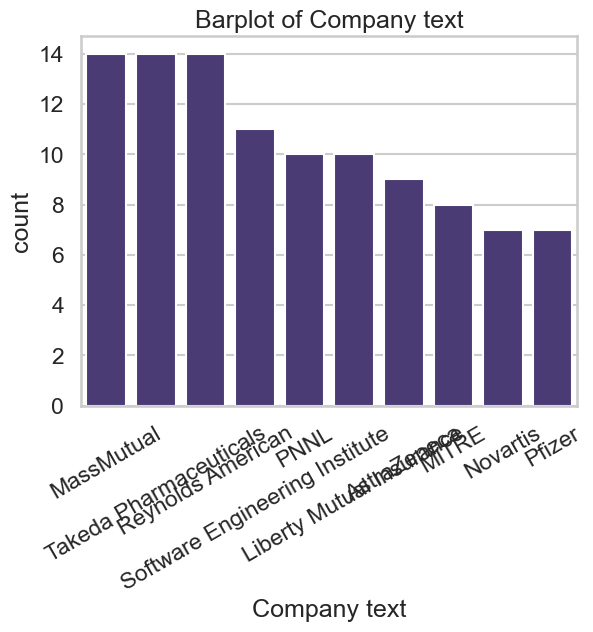

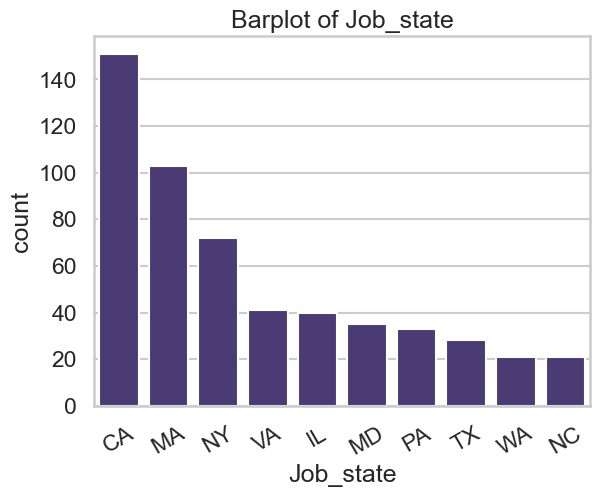

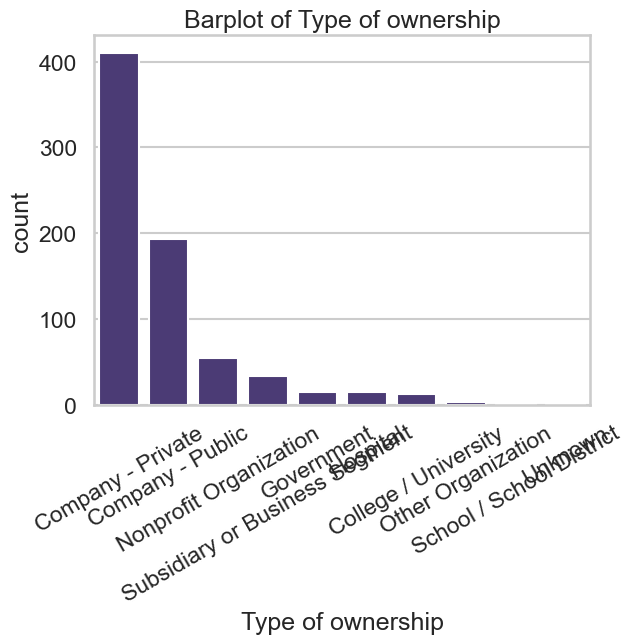

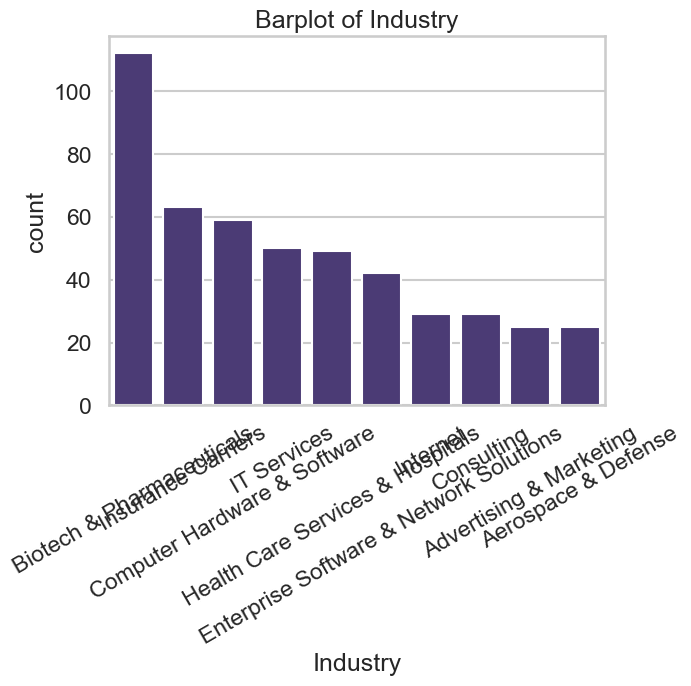

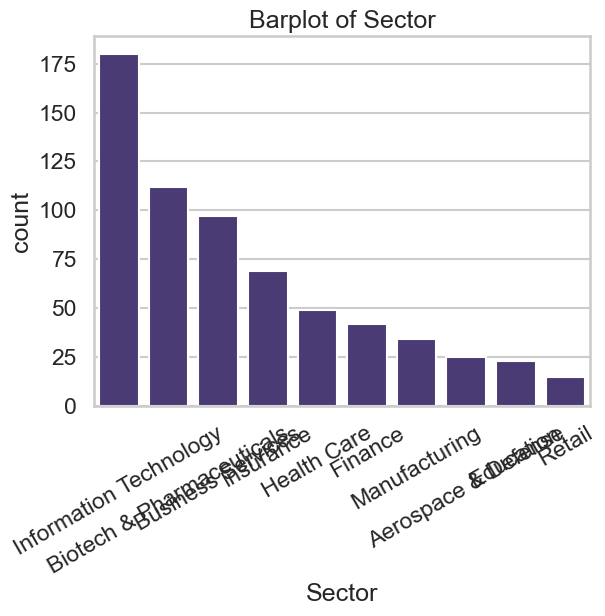

In [9]:
plot_col = [ 'job_category','seniority', 'Company text','Job_state','Type of ownership','Industry','Sector']

for col in plot_col :
    # plt.figure(figsize=(8,3))
    plt.title(f'Barplot of {col}')
    data= df[col].value_counts().sort_values(ascending=False)[:10]
    sns.barplot(x= data.index,y=data)
    plt.xticks(rotation=30)
    plt.show()

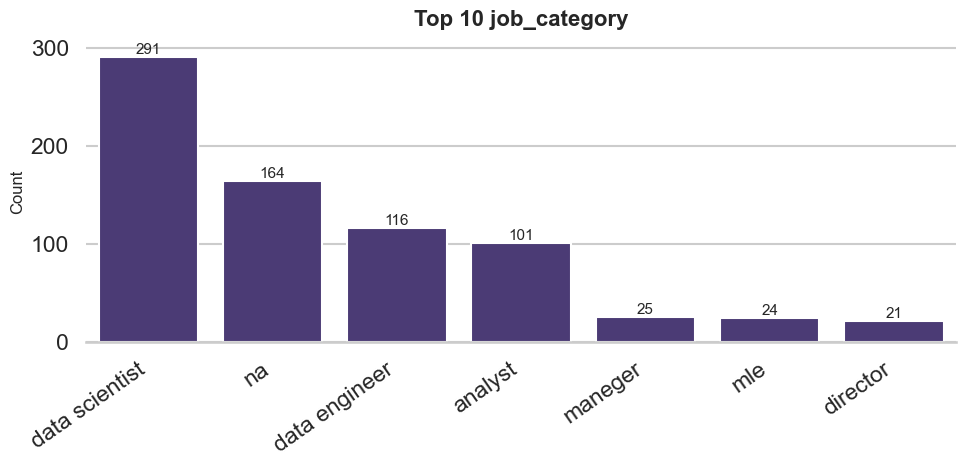

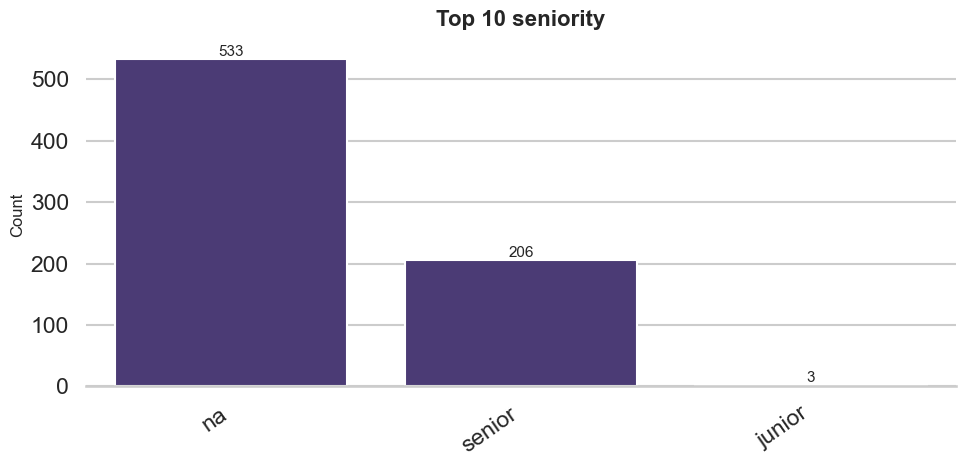

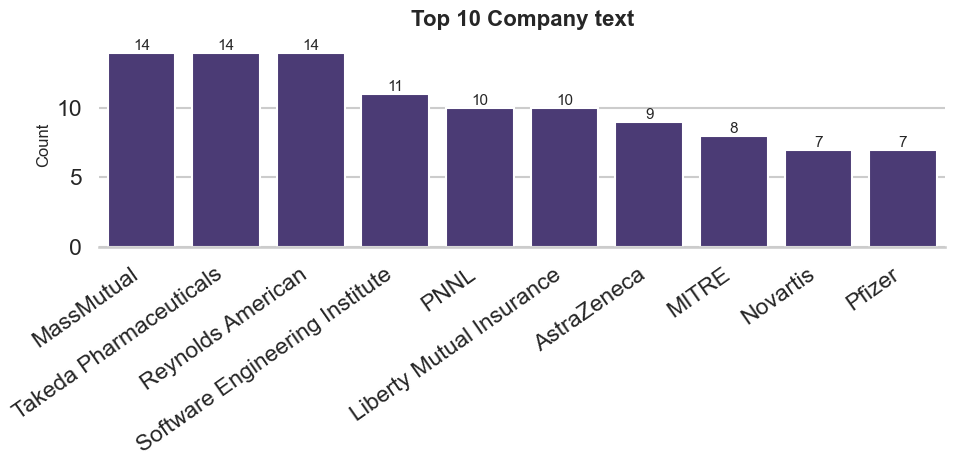

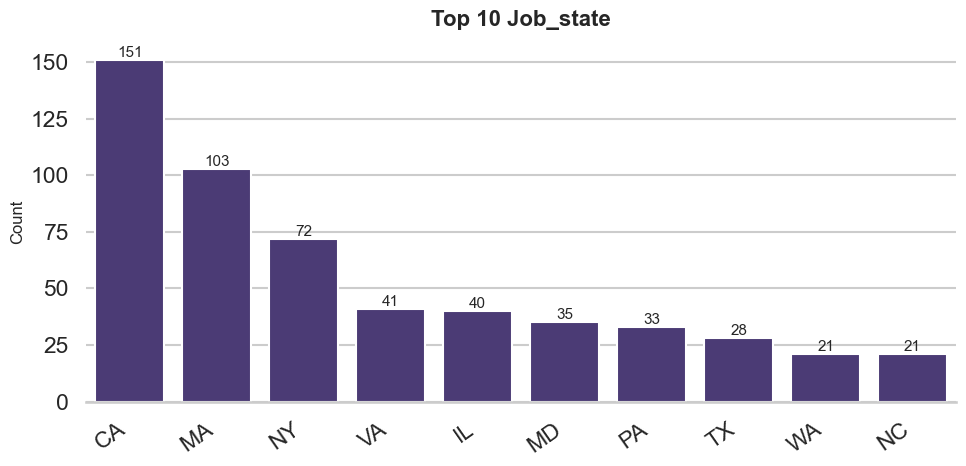

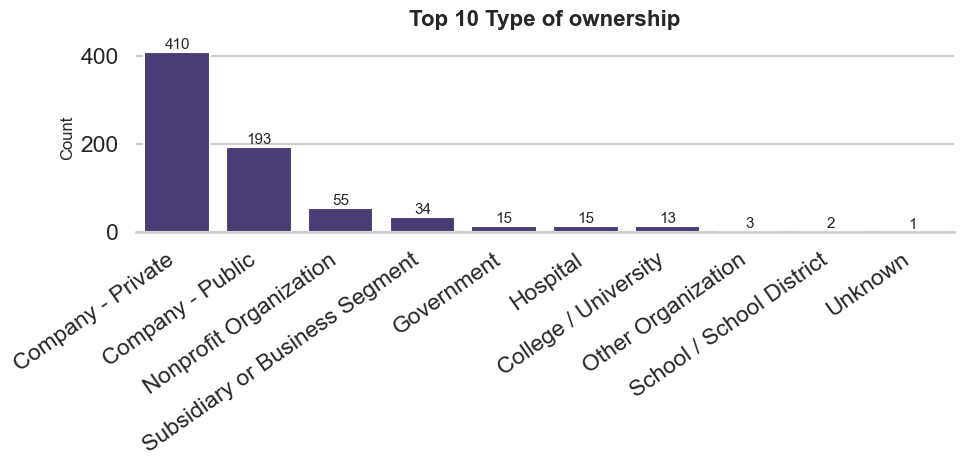

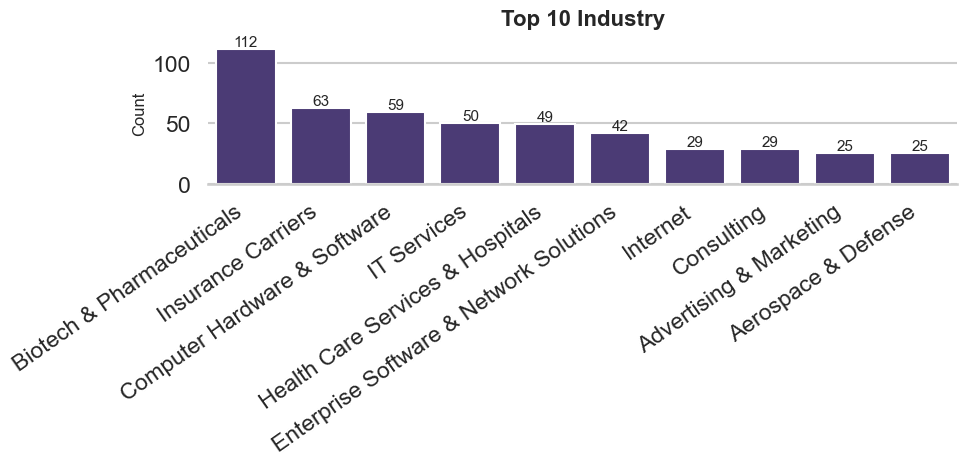

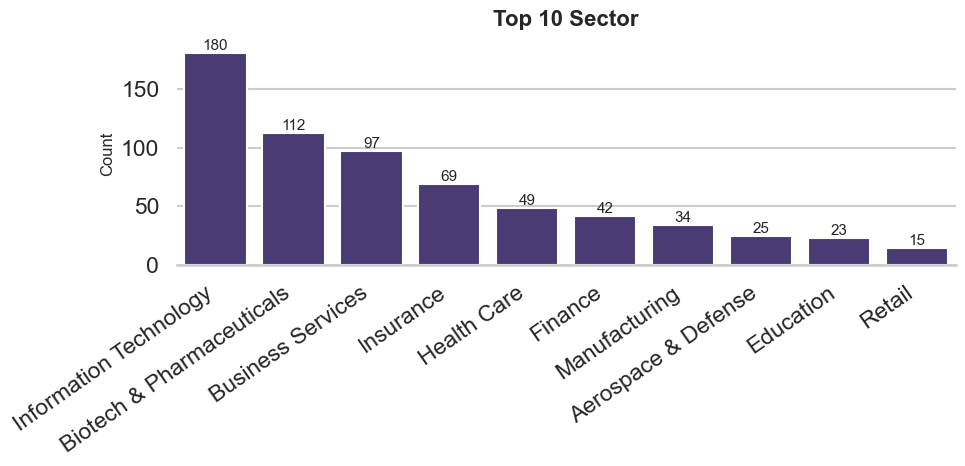

In [10]:
for col in plot_col:
    
    data = (
        df[col]
        .value_counts()
        .head(10)
        .reset_index()
    )
    data.columns = [col, "count"]

    plt.figure(figsize=(10, 5))

    ax = sns.barplot(
        data=data,
        x=col,
        y="count"
    )

    # Title
    ax.set_title(f"Top 10 {col}", fontsize=16, weight="bold", pad=12)

    # Axis labels
    ax.set_xlabel("")
    ax.set_ylabel("Count", fontsize=12)

    # Rotate x labels
    plt.xticks(rotation=35, ha="right")

    # Add value labels on bars
    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height())}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom', fontsize=11
        )

    sns.despine(left=True)
    plt.tight_layout()
    plt.show()

In [11]:
pd.pivot_table(df,index=['job_category','seniority'] ,values='Avg_salary') 

Avg_salary
job_category   seniority            
analyst        junior      53.250000
               na          60.619718
               senior      80.928571
data engineer  na          95.356250
               senior     123.638889
data scientist junior     106.500000
               na         109.597087
               senior     131.369048
director       na         160.684211
               senior     106.500000
maneger        na          90.888889
               senior      99.214286
mle            na         117.750000
               senior     127.000000
na             na          80.223140
               senior     107.093023

In [12]:
df.columns

Index(['Job Title', 'job_category', 'seniority', 'Job Description', 'desc_len',
       'Rating', 'Company Name', 'Company text', 'Location', 'Headquarters',
       'Job_state', 'same_state', 'Size', 'Founded', 'company_age',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'competitors_counts', 'Hourly', 'employe provided', 'skill_python',
       'skill_r studio', 'skill_excel', 'skill_machine learning',
       'skill_analysis', 'skill_spark', 'skill_aws', 'Min_salary',
       'Max_salary', 'Avg_salary'],
      dtype='object')

In [13]:
pivit_col = [ 'job_category','seniority','Job_state','Type of ownership','Industry','Sector','skill_python',
       'skill_r studio', 'skill_excel', 'skill_machine learning',
       'skill_analysis', 'skill_spark']

for i in pivit_col:
    print(pd.pivot_table(data=df,index=i,values='Avg_salary').sort_values('Avg_salary',ascending=False))


                Avg_salary
job_category              
director        155.523810
mle             120.062500
data scientist  115.871134
data engineer   104.133621
maneger          93.220000
na               87.268293
analyst          66.103960
           Avg_salary
seniority            
senior     116.633495
na          95.731707
junior      71.000000
           Avg_salary
Job_state            
CA         123.619205
IL         116.662500
DC         110.181818
MA         107.412621
NJ         104.558824
MI         100.250000
RI         100.000000
NY          98.652778
NC          98.452381
MD          97.357143
KY          97.000000
VA          95.621951
UT          94.150000
PA          93.803030
WA          93.190476
TX          92.464286
OR          92.125000
IN          90.300000
TN          89.192308
OH          87.571429
KS          87.000000
AZ          85.666667
CO          85.636364
MN          85.500000
MO          84.722222
GA          80.666667
IA          78.900000
FL       

In [14]:
pd.pivot_table(data=df,index='Revenue',values='Avg_salary').sort_values('Avg_salary',ascending=False)

,Avg_salary
Revenue,
$5 to $10 million (USD),126.111111
$1 to $5 million (USD),119.312500
-1,117.500000
$10+ billion (USD),115.568548
Less than $1 million (USD),108.625000
Unknown / Non-Applicable,105.002463
$1 to $2 billion (USD),104.533333
$50 to $100 million (USD),102.434783
$10 to $25 million (USD),101.515625


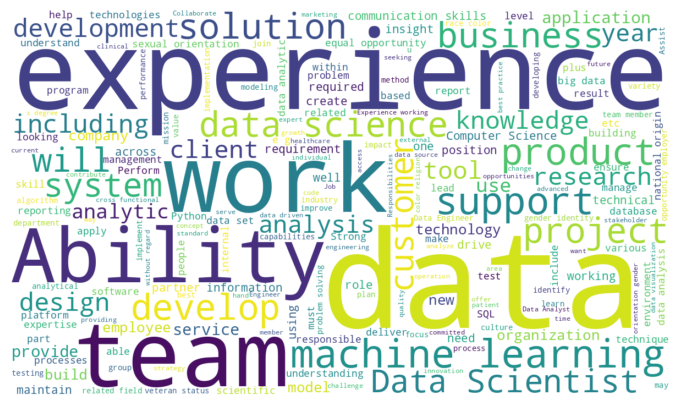

In [20]:

from wordcloud import WordCloud

# 1. Create a sample DataFrame (replace with your actual data)
all_text = ' '.join(df['Job Description'].astype(str))

# 3. Generate the word cloud

# 4. Display the image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
